### Вычисление корреляций между голосованием депутатов

In [1]:
import numpy as np
import pandas as pd
import time
import json
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Загрузка основного датафрейма с результатами голосований
df_full = pd.read_csv('./data/df_full_cr.csv', index_col=0)

In [3]:
df_full.head()

,law_name,vote_result,Авдеев Александр Александрович,Адучиев Батор Канурович,Азимов Рахим Азизбоевич,Аксаков Анатолий Геннадьевич,Алексеева Татьяна Олеговна,Альшевских Андрей Геннадьевич,Ананских Игорь Александрович,Аникеев Григорий Викторович,...,Эмиргамзаев Абдулгамид Гасанович,Юмашева Инга Альбертовна,Юрков Дмитрий Васильевич,Ющенко Александр Андреевич,Ямпольская Елена Александровна,Яровая Ирина Анатольевна,Антошкин Николай Тимофеевич,Зиннуров Ирек Хайдарович,Кобзев Юрий Викторович,Шурчанов Валентин Сергеевич
113991,(за основу) О проекте порядка работы Государст...,принят,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,2,2,2,2
113990,Регистрация 12:01.02,принят,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
113989,(первое чтение) О проекте федерального закона ...,отклонен,2,2,2,-1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
113988,(первое чтение) О проекте федерального закона ...,отклонен,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,-1
113987,(первое чтение) О проекте федерального закона ...,принят,-1,2,-1,-1,2,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


2 - не голосовал, 1 - "против", 0 - воздержался, -1 - "за"

In [4]:
# Загрузка словаря со списком депутатов и их партий
b_file = open("./data/dep_part_dict.json", "r")
dep_part_dict = json.load(b_file)
b_file.close()

In [5]:
dep_df = pd.DataFrame.from_dict(dep_part_dict, orient='index')
dep_df

,0
Авдеев Александр Александрович,ЕР
Адучиев Батор Канурович,ЕР
Азимов Рахим Азизбоевич,ЕР
Аксаков Анатолий Геннадьевич,СР
Алексеева Татьяна Олеговна,ЕР
...,...
Любимов Николай Викторович,ЕР
Меткин Александр Михайлович,ЕР
Скоробогатько Александр Иванович,ЕР
Макаровец Николай Александрович,ЕР


In [6]:
dep_df_cr = dep_df.loc[df_full.columns[2:].values, :]

# Корреляция

In [7]:
# Функция подсчёта итогов голосования
def vote_result(row):
    v_sum = 0
    for v in row:
        if np.abs(v) == 1:
            v_sum += v
    return v_sum

### Создание датафреймов для каждой партии и вычисление коэффициента корреляции Пирсона между всеми депутатами в партии

#### Справедливая Россия

In [8]:
df_SR = df_full.loc[:, dep_df_cr[dep_df_cr[0] == 'СР'].index]
df_SR['SR_result'] = df_SR.apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)
df_SR.head()

,Аксаков Анатолий Геннадьевич,Ананских Игорь Александрович,Белоусов Вадим Владимирович,Газзаев Валерий Георгиевич,Гартунг Валерий Карлович,Грешневиков Анатолий Николаевич,Драпеко Елена Григорьевна,Емельянов Михаил Васильевич,Крючек Сергей Иванович,Миронов Сергей Михайлович,Нилов Олег Анатольевич,Омаров Гаджимурад Заирбекович,Ремезков Александр Александрович,Рыжак Николай Иванович,Терентьев Александр Васильевич,Тумусов Федот Семёнович,Хованская Галина Петровна,Чепа Алексей Васильевич,Шеин Олег Васильевич,SR_result
113991,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,-1,-1,2,-1,-1
113990,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
113989,-1,2,-1,-1,2,2,2,2,-1,2,-1,2,-1,2,2,2,-1,2,-1,-1
113988,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
113987,-1,-1,-1,-1,-1,2,-1,2,-1,-1,-1,2,-1,-1,-1,-1,-1,2,-1,-1


<AxesSubplot:>

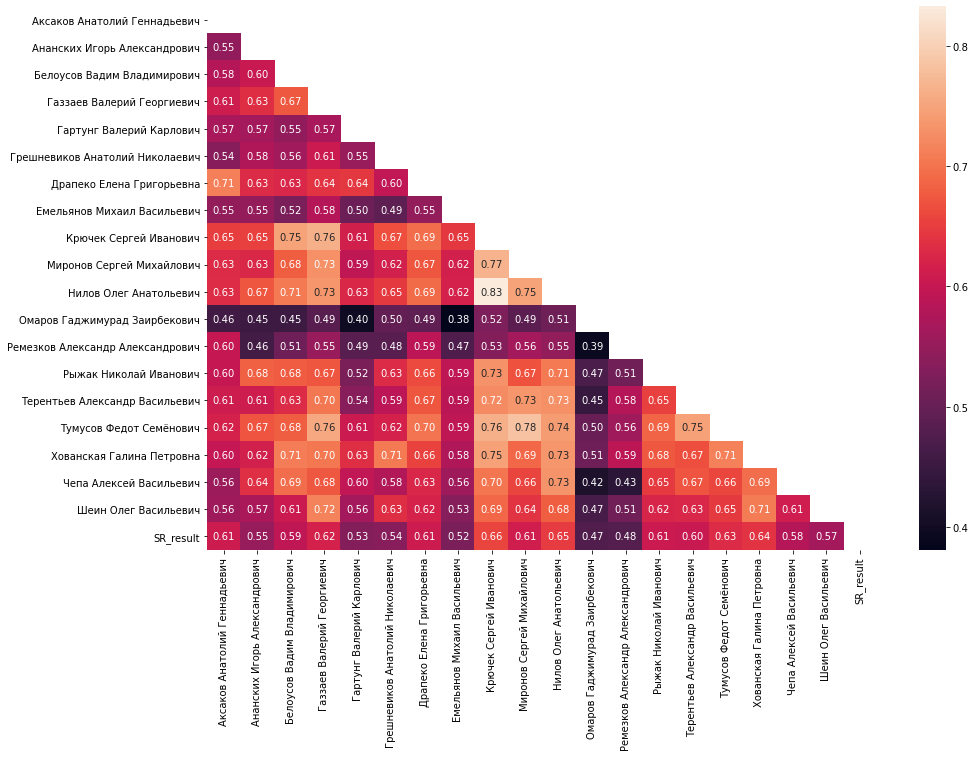

In [9]:
corr = df_SR.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')

#### ЛДПР

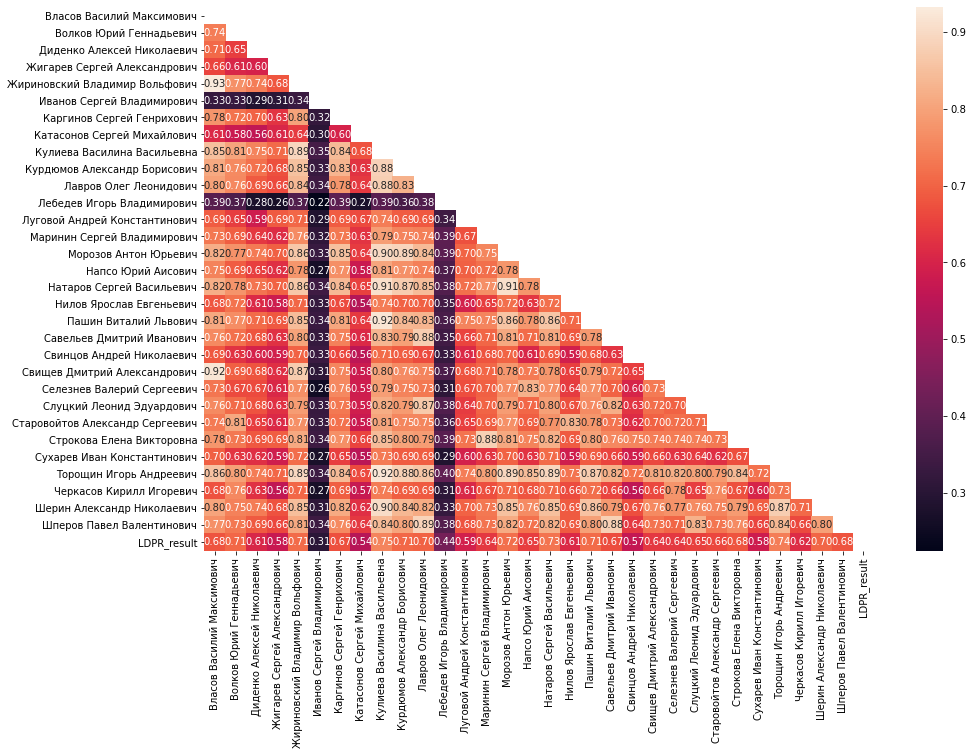

In [10]:
df_LDPR = df_full.loc[:, dep_df_cr[dep_df_cr[0] == 'ЛДПР'].index]
df_LDPR['LDPR_result'] = df_LDPR.apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)
    
corr = df_LDPR.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

#### КПРФ

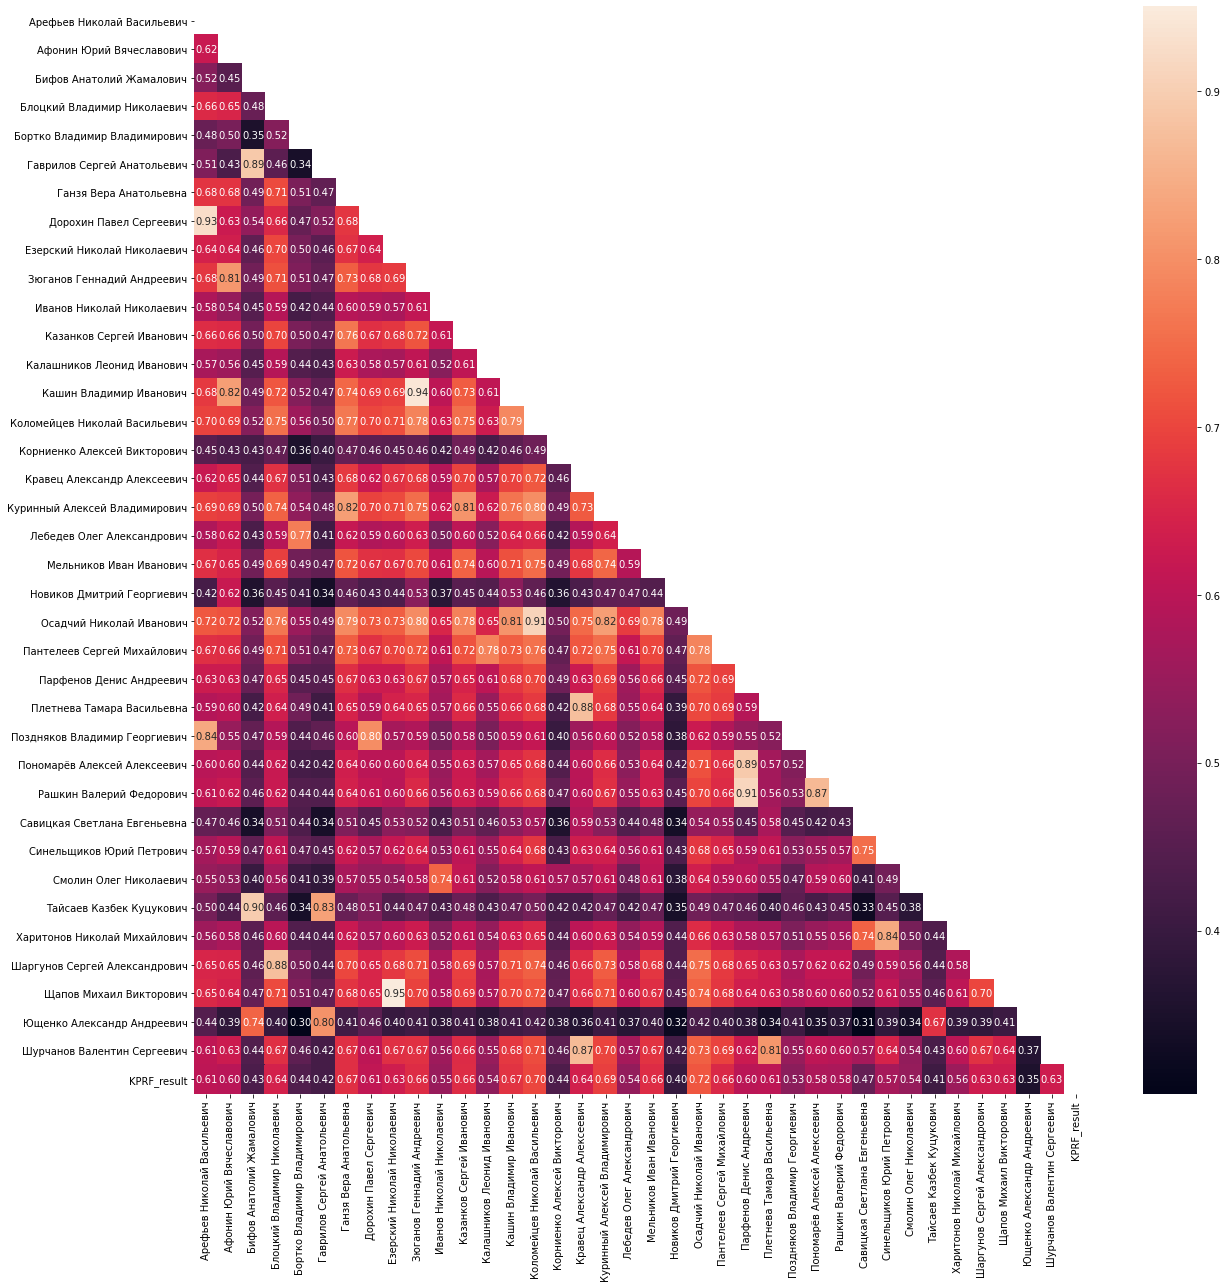

In [11]:
df_KPRF = df_full.loc[:, dep_df_cr[dep_df_cr[0] == 'КПРФ'].index]
df_KPRF['KPRF_result'] = df_KPRF.apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)
    
corr = df_KPRF.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

#### Единая Россия

<AxesSubplot:>

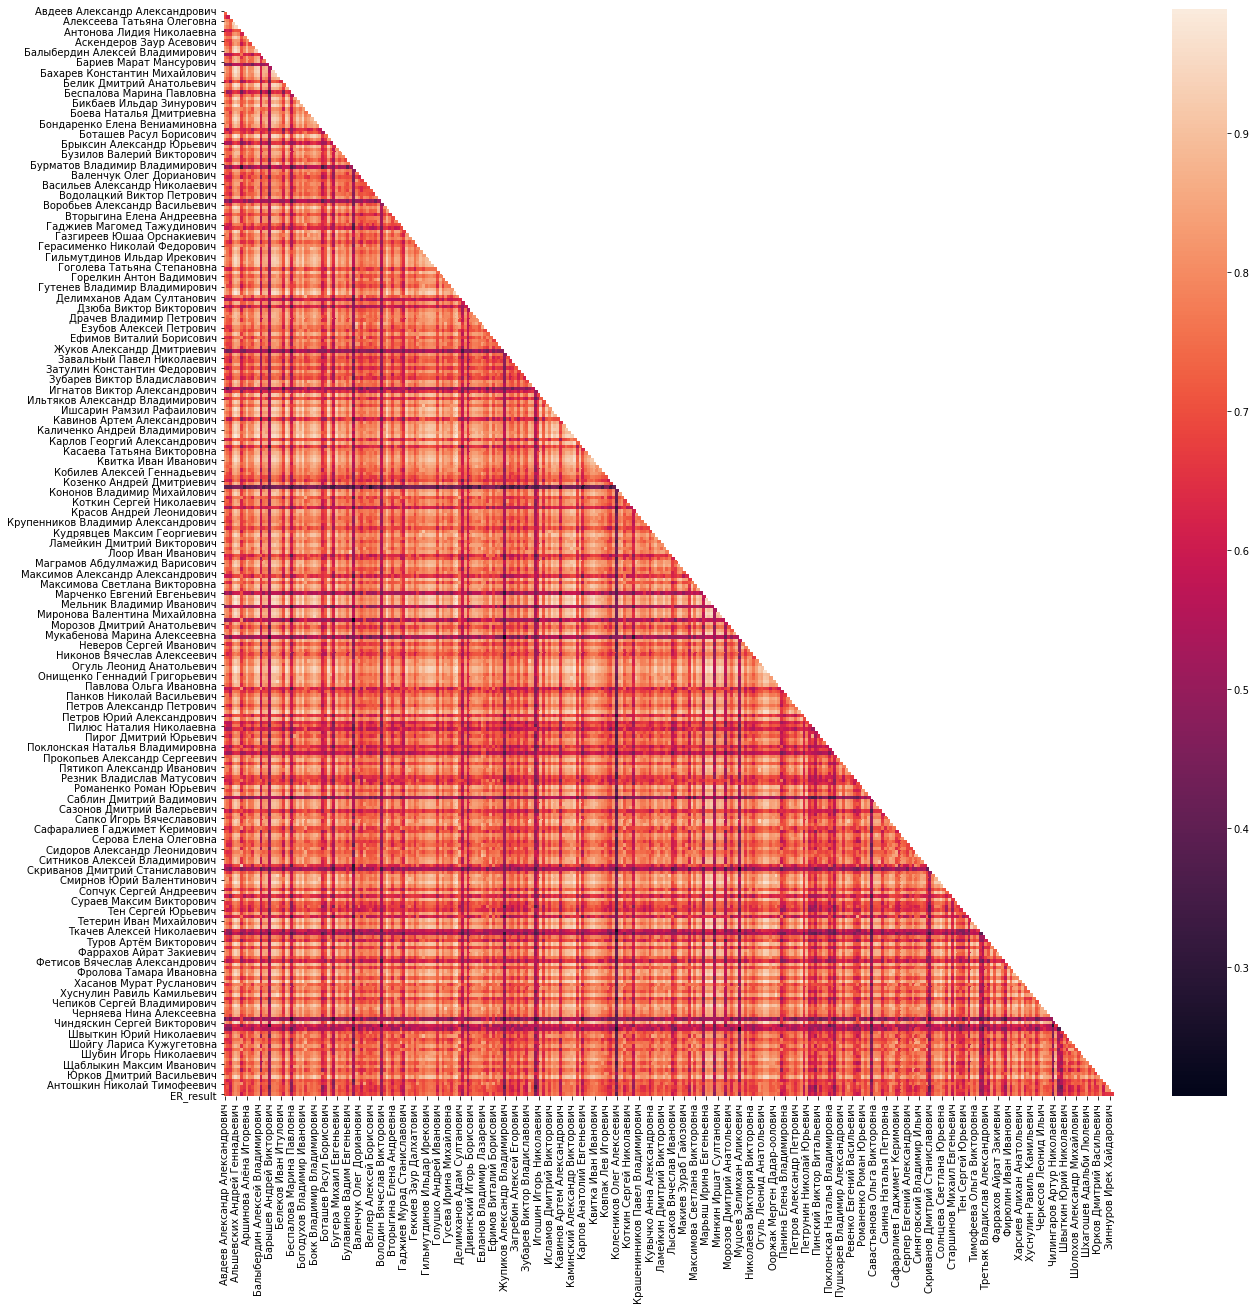

In [12]:
df_ER = df_full.loc[:, dep_df_cr[dep_df_cr[0] == 'ЕР'].index]
df_ER['ER_result'] = df_ER.apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)
    
corr = df_ER.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, fmt='.2f')

In [13]:
# Определение попарных корреляций выше заданного threshold
def corr_feature_detect(data, threshold=0.8, feature_name='feature'):
    
    feature1 = feature_name + ' 1'
    feature2 = feature_name + ' 2'
    
    corrmat = data.corr()
    corrmat = corrmat.unstack() 
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] 
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = [feature1, feature2, 'corr']
    corrmat = corrmat.drop(index=corrmat[corrmat.index % 2 == 1].index).reset_index(drop=True)
   
    return corrmat

In [14]:
corr_feature_detect(data=df_SR, threshold=0.8, feature_name='Депутат')

,Депутат 1,Депутат 2,corr
0,Нилов Олег Анатольевич,Крючек Сергей Иванович,0.832907


In [15]:
corr_feature_detect(data=df_LDPR, threshold=0.9, feature_name='Депутат')

,Депутат 1,Депутат 2,corr
0,Власов Василий Максимович,Жириновский Владимир Вольфович,0.932483
1,Кулиева Василина Васильевна,Торощин Игорь Андреевич,0.923478
2,Кулиева Василина Васильевна,Пашин Виталий Львович,0.918986
3,Власов Василий Максимович,Свищев Дмитрий Александрович,0.918893
4,Морозов Антон Юрьевич,Натаров Сергей Васильевич,0.909643
5,Натаров Сергей Васильевич,Кулиева Василина Васильевна,0.908829
6,Кулиева Василина Васильевна,Шерин Александр Николаевич,0.903281


In [16]:
corr_feature_detect(data=df_KPRF, threshold=0.9, feature_name='Депутат')

,Депутат 1,Депутат 2,corr
0,Щапов Михаил Викторович,Езерский Николай Николаевич,0.950341
1,Кашин Владимир Иванович,Зюганов Геннадий Андреевич,0.940693
2,Арефьев Николай Васильевич,Дорохин Павел Сергеевич,0.927242
3,Парфенов Денис Андреевич,Рашкин Валерий Федорович,0.913571
4,Коломейцев Николай Васильевич,Осадчий Николай Иванович,0.908422


In [17]:
corr_feature_detect(data=df_ER, threshold=0.9, feature_name='Депутат')

,Депутат 1,Депутат 2,corr
0,Альшевских Андрей Геннадьевич,Хасанов Мурат Русланович,0.989511
1,Канаев Алексей Валерианович,Альшевских Андрей Геннадьевич,0.989392
2,Данчикова Галина Иннокентьевна,Альшевских Андрей Геннадьевич,0.986988
3,Альшевских Андрей Геннадьевич,Окунева Ольга Владимировна,0.986043
4,Хасанов Мурат Русланович,Канаев Алексей Валерианович,0.985557
...,...,...,...
2673,Качкаев Павел Рюрикович,Бахметьев Виталий Викторович,0.900028
2674,Квитка Иван Иванович,Смирнов Юрий Валентинович,0.900024
2675,Носов Александр Алексеевич,Бессарабов Даниил Владимирович,0.900021
2676,Фролова Тамара Ивановна,Изотов Алексей Николаевич,0.900020


### Определение депутатов, которые всегда голосуют так же, как большинство в их партии

#### Справедливая Россия

In [18]:
deps_SR = list(df_SR.drop(columns=['SR_result']).columns.values)

for ind in df_SR.index.values:
    for d in deps_SR:
        vote = df_SR.loc[ind, d]
        if vote != df_SR.loc[ind, 'SR_result'] and (vote != 0 and vote != 2):
            deps_SR.remove(d)
    if len(deps_SR) == 0:
        break
len(deps_SR)

0

#### ЛДПР

In [19]:
deps_LDPR = list(df_LDPR.drop(columns=['LDPR_result']).columns.values)

#LDPR_result = df_LDPR.apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)

for ind in df_LDPR.index.values:
    for d in deps_LDPR:
        vote = df_LDPR.loc[ind, d]
        if vote != df_LDPR.loc[ind, 'LDPR_result'] and (vote != 0 and vote != 2):
            deps_LDPR.remove(d)
    if len(deps_LDPR) == 0:
        break
len(deps_LDPR)

5

In [20]:
deps_LDPR

['Жириновский Владимир Вольфович',
 'Кулиева Василина Васильевна',
 'Морозов Антон Юрьевич',
 'Пашин Виталий Львович',
 'Свищев Дмитрий Александрович']

#### КПРФ

In [21]:
deps_KPRF = list(df_KPRF.drop(columns=['KPRF_result']).columns.values)

#KPRF_result = df_KPRF.apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)

for ind in df_KPRF.index.values:
    for d in deps_KPRF:
        vote = df_KPRF.loc[ind, d]
        if vote != df_KPRF.loc[ind, 'KPRF_result'] and (vote != 0 and vote != 2):
            if d == 'Кузякин Дмитрий Викторович':
                print("vote = {}, KPRF_result = {}".format(vote, KPRF_result[ind]))
            deps_KPRF.remove(d)
    if len(deps_KPRF) == 0:
        break
len(deps_KPRF)

0

#### Единая Россия

In [22]:
deps_ER = list(df_ER.drop(columns=['ER_result']).columns.values)

#ER_result = df_ER.apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)

for ind in df_ER.index.values:
    for d in deps_ER:
        vote = df_ER.loc[ind, d]
        if vote != df_ER.loc[ind, 'ER_result'] and (vote != 0 and vote != 2):
            deps_ER.remove(d)
    if len(deps_ER) == 0:
        break
len(deps_ER)

60

In [23]:
deps_ER

['Азимов Рахим Азизбоевич',
 'Альшевских Андрей Геннадьевич',
 'Аскендеров Заур Асевович',
 'Балыбердин Алексей Владимирович',
 'Бикбаев Ильдар Зинурович',
 'Богуславский Ирек Борисович',
 'Боева Наталья Дмитриевна',
 'Валуев Николай Сергеевич',
 'Ветлужских Андрей Леонидович',
 'Воевода Алексей Иванович',
 'Воронина Татьяна Евгеньевна',
 'Ганиев Фарит Глюсович',
 'Делимханов Адам Султанович',
 'Дерябкин Виктор Ефимович',
 'Изотов Алексей Николаевич',
 'Ишсарин Рамзил Рафаилович',
 'Каличенко Андрей Владимирович',
 'Канаев Алексей Валерианович',
 'Карпов Анатолий Евгеньевич',
 'Колесников Олег Алексеевич',
 'Кравченко Денис Борисович',
 'Кривоносов Сергей Владимирович',
 'Кувшинова Наталья Сергеевна',
 'Кудрявцев Максим Георгиевич',
 'Левицкий Юрий Андреевич',
 'Макиев Зураб Гайозович',
 'Максимова Светлана Викторовна',
 'Москвин Денис Павлович',
 'Москвичев Евгений Сергеевич',
 'Муцоев Зелимхан Аликоевич',
 'Назарова Наталья Васильевна',
 'Никонов Вячеслав Алексеевич',
 'Огуль Леонид 

Проверка корреляции между партиями

In [24]:
df_p = pd.concat([df_SR['SR_result'], df_LDPR['LDPR_result'], df_KPRF['KPRF_result'], df_ER['ER_result']], axis=1, join='inner')
df_p.columns = ['СР', 'ЛДПР', 'КПРФ', 'ЕР']
df_p.head()

,СР,ЛДПР,КПРФ,ЕР
113991,-1,-1,-1,-1
113990,0,0,0,0
113989,-1,0,0,0
113988,0,-1,-1,0
113987,-1,-1,-1,-1


<AxesSubplot:>

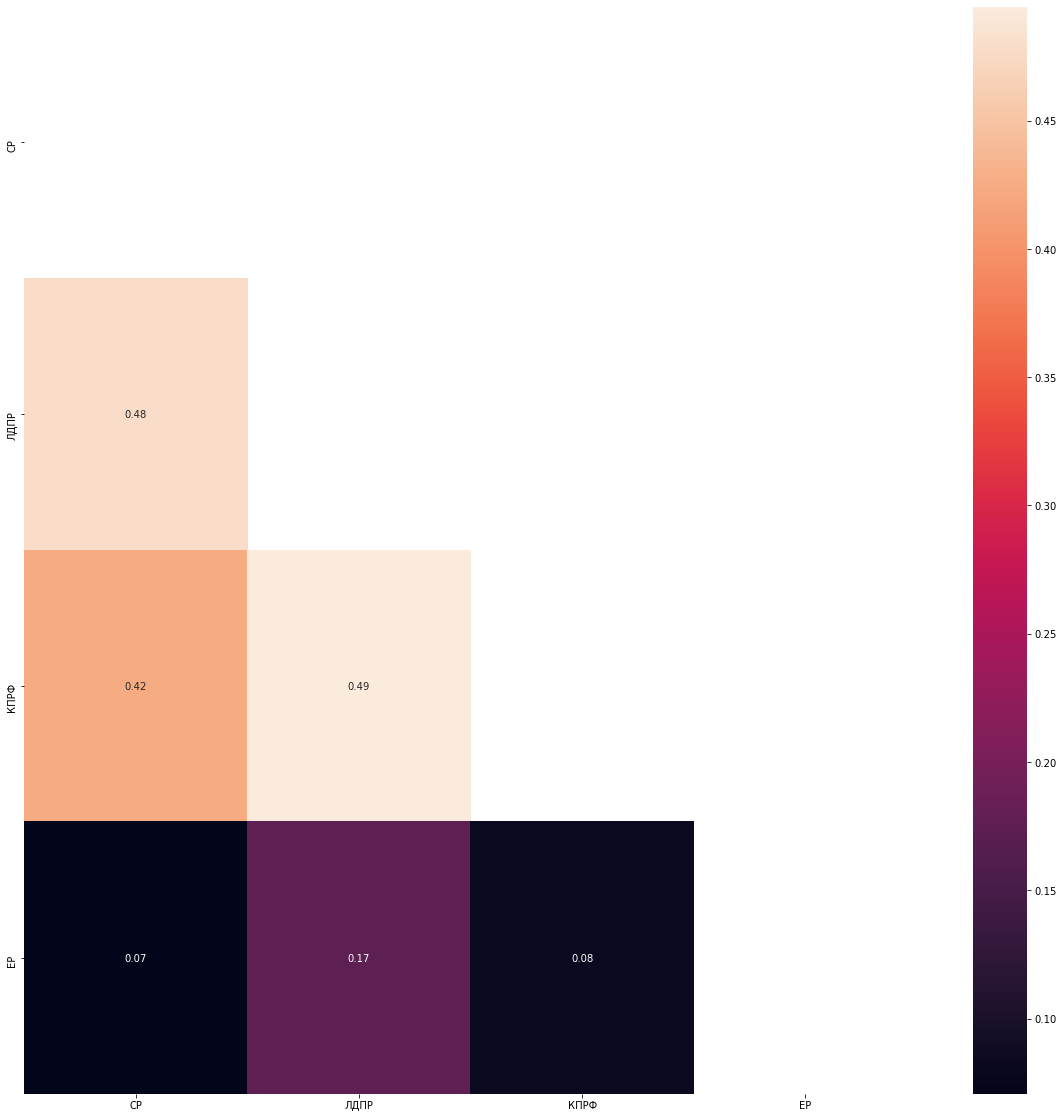

In [25]:
corr = df_p.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')

In [26]:
corr_feature_detect(data=df_p, threshold=0, feature_name='Партия')

,Партия 1,Партия 2,corr
0,КПРФ,ЛДПР,0.494457
1,ЛДПР,СР,0.478254
2,КПРФ,СР,0.424538
3,ЕР,ЛДПР,0.174167
4,ЕР,КПРФ,0.082659
5,ЕР,СР,0.070680
